Alfred Wisana
c14210177

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Klasifikasi Segi 4 Untuk Membededakan bentuk segi 4 berdasarkan sudut pada object

In [40]:

def classify_quadrilateral(approx):
    (x, y, w, h) = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    
    if 0.95 <= aspect_ratio <= 1.05:
        return "square"
    else:
        sides = []
        for i in range(4):
            sides.append(np.linalg.norm(approx[i] - approx[(i + 1) % 4]))

        sides = np.array(sides)
        opposite_sides_equal = np.isclose(sides[0], sides[2], atol=0.1) and np.isclose(sides[1], sides[3], atol=0.1)
        all_sides_equal = np.isclose(sides[0], sides[1], atol=0.1) and np.isclose(sides[1], sides[2], atol=0.1) and np.isclose(sides[2], sides[3], atol=0.1)

        cosines = []
        for i in range(4):
            cos = angle_cos(approx[i], approx[(i + 1) % 4], approx[(i + 2) % 4])
            cosines.append(cos)
        
        cosines = np.sort(cosines)
        
        if all_sides_equal:
            return "rhombus"
        elif opposite_sides_equal:
            if np.allclose(cosines, [0, 0, 0, 0], atol=0.1):
                return "rectangle"
            else:
                return "parallelogram"
        else:
            return "trapezoid"

def angle_cos(p0, p1, p2):
    d1, d2 = (p0 - p1).flatten(), (p2 - p1).flatten()
    return np.dot(d1, d2) / (np.linalg.norm(d1) * np.linalg.norm(d2))

In [46]:
def detect_shapes(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Perform edge detection
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop over the contours
    for contour in contours:
        # Compute the center of the contour
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        else:
            cX, cY = 0, 0

        # Approximate the contour
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)

        # Determine the shape
        shape = "Unknown"
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = classify_quadrilateral(approx)
            # Untuk lebih dari segi 4 akan diguanakn berdasarkan circularity dari object 
        else:
            # Compute contour properties for more complex shapes
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            circularity = 0
            if perimeter != 0.0:
                circularity = 4 * np.pi * (area / perimeter**2)
            
            if 0.85 < circularity < 1.2:
                shape = "Circle"
            else:
                # Fit an ellipse to the contour
                if len(contour) >= 5:  # Need at least 5 points to fit an ellipse
                    ellipse = cv2.fitEllipse(contour)
                    (center, axes, orientation) = ellipse
                    major_axis_length = max(axes)
                    minor_axis_length = min(axes)
                    eccentricity = np.sqrt(1 - (minor_axis_length / major_axis_length) ** 2)
                    
                    if eccentricity > 0.8:  # Empirical threshold for distinguishing circle from oval
                        shape = "Oval"
                        
        if shape == "Unknown":
            circularity = 0
            if perimeter != 0.0:
                circularity = 4 * np.pi * (area / (perimeter * perimeter))
            if len(approx) == 5 and circularity > 0.75 and circularity < 0.8:
                shape = "Pentagon"
            elif len(approx) == 6 and circularity > 0.8 and circularity < 0.85:
                shape = "Hexagon"

        # Draw the contour and the name of the shape on the image
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    return contours,image

9


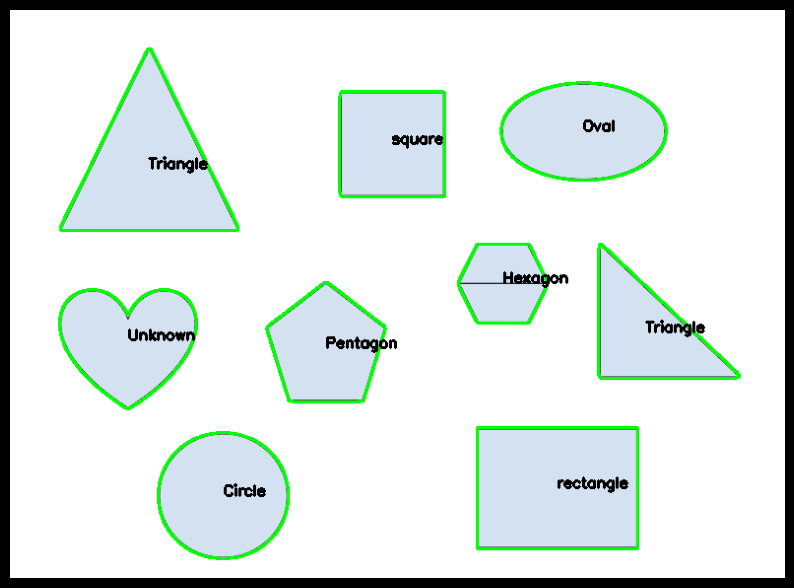

In [48]:
# Load an image
image_path = "shapes5.png"  # Replace with your image path
image = cv2.imread(image_path)

shape,output_image = detect_shapes(image)
print(len(shape))
# Display the output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

3


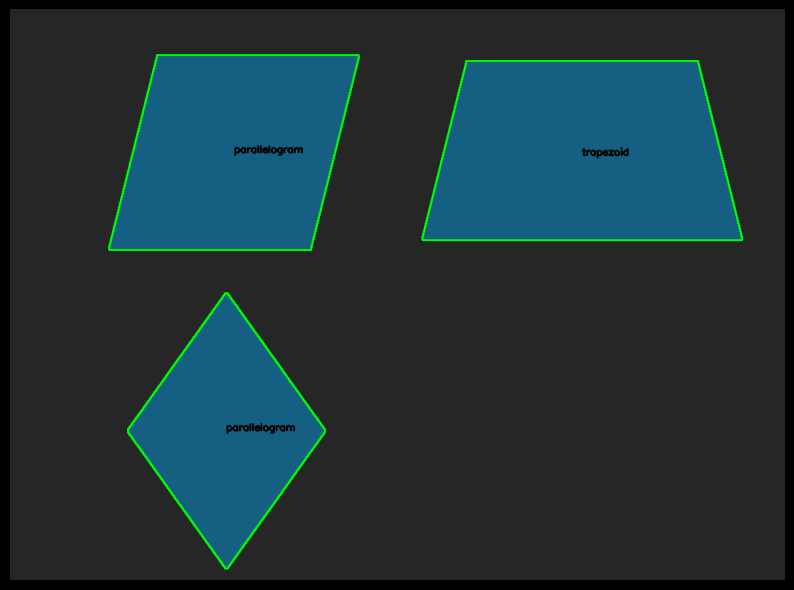

In [49]:
image_path = "shapes6.png"  # Replace with your image path
image = cv2.imread(image_path)

shape,output_image = detect_shapes(image)
print(len(shape))

# Display the output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Belah Ketupat  (yg dibawah ) dideteksi sebagai jajar genjang

2


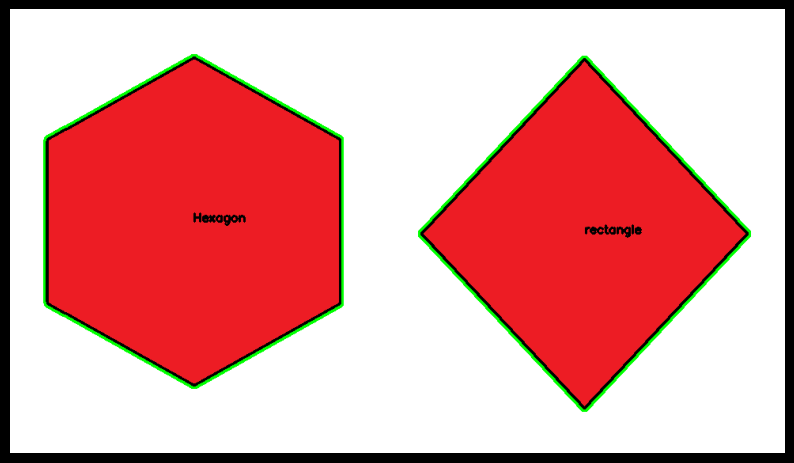

In [50]:
image_path = "shapes7.png"  # Replace with your image path
image = cv2.imread(image_path)

shape,output_image = detect_shapes(image)
print(len(shape))

# Display the output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Jajar Genjang didteksi sebagai persegi panjang

3


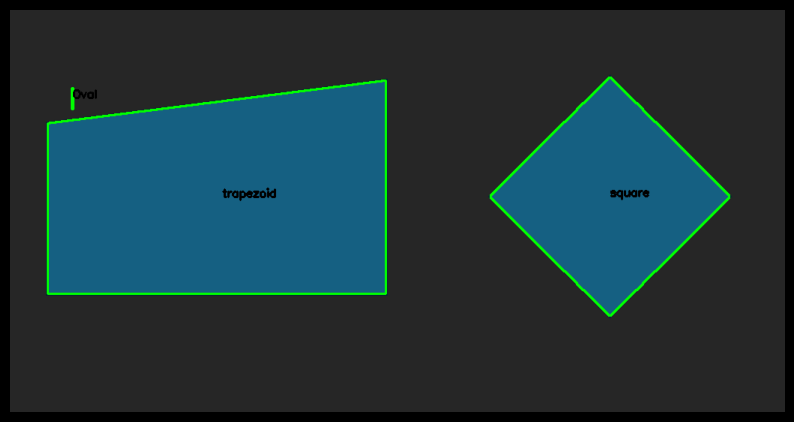

In [51]:
image_path = "shapes8.png"  # Replace with your image path
image = cv2.imread(image_path)

shape,output_image = detect_shapes(image)
print(len(shape))

# Display the output image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Belah ketupat dideteksi sebagai persegi